# Simple DNN with Relu alternatives activation #

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

import pandas as pd

concrete = pd.read_csv('./Data/DNN_concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# 2) Define a Model with Hidden Layers #

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (8,)

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=(8,)),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1)
])

In [4]:
# same with above MDLing
# model = keras.Sequential([
#     layers.Dense(32, input_shape=[8]),
#     layers.Activation('relu'),
#     layers.Dense(32),
#     layers.Activation('relu'),
#     layers.Dense(1),
# ])

# Alternative activations to ReLU #

Actually, elu & selu functions that change exponentially occur the overflow during backpropagation in a high probability.
Therefore, learning would stop unless without the normalization process.

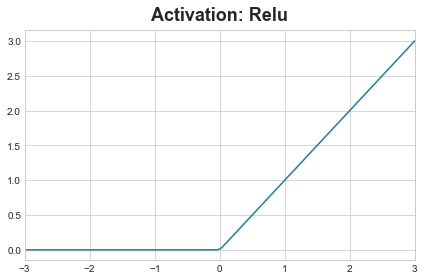

In [28]:
def relu(x) :
	return np.maximum(0, x)

activation_layer = layers.Activation('relu')
x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.plot(x, y)
plt.xlim(-3, 3)
plt.title('Activation: Relu')
plt.show()

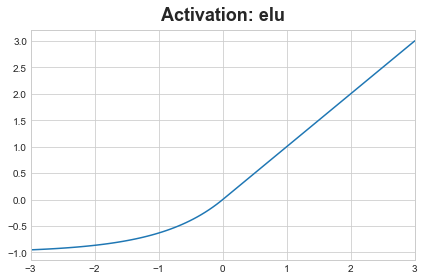

In [29]:
# Exponential Linear Unit
# def elu(z, alpha):
#     return z if z>=0 else alpha*(e^z -1)

activation_layer = layers.Activation('elu')
x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x)

plt.plot(x, y)
plt.xlim(-3, 3)
plt.title('Activation: elu')
plt.show()

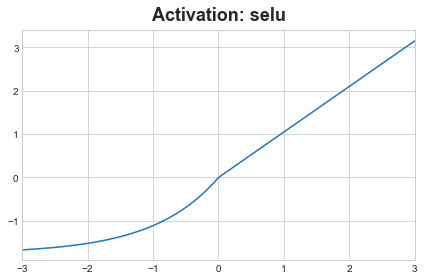

In [30]:

# Scaled Exponential Linear Unit
# selu= lamba * elu
activation_layer = layers.Activation('selu')
x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x)

plt.plot(x, y)
plt.xlim(-3, 3)
plt.title('Activation: selu')
plt.show()

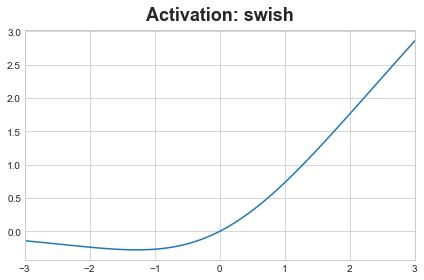

In [32]:
def swish(x) :
    return x * tf.nn.sigmoid(x)

activation_layer = layers.Activation('swish')
x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x)

plt.plot(x, y)
plt.xlim(-3, 3)
plt.title('Activation: swish')
plt.show()

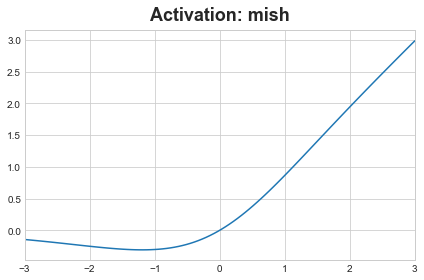

In [33]:
def mish(x) :
    return x * tf.nn.tanh( tf.nn.softplus(x))

x = tf.linspace(-3.0, 3.0, 100)
y = mish(x)

plt.plot(x, y)
plt.xlim(-3, 3)
plt.title('Activation: mish')
plt.show()